In [71]:
import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import ticker
from torchtext.datasets import WikiText2
from torchtext import data
from spacy.symbols import ORTH

sns.set()

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 400

In [5]:
def read_file(fname):
    batch_length = 100000
    finished = False
    with open(fname) as file:
        while not finished:
            batch = file.read(batch_length)
            if batch == "":
                finished = True
                return

            yield batch

In [14]:
def count_sentence_frequency(file_path):
    nlp = spacy.load('en')
    counts = {}
    for batch in read_file(file_path):
        tokens = nlp(batch.lower())
        for sent in tokens.sents:
            counted = set()
            for token in tokens[sent.start:sent.end]:
                label = token.orth
                if ent not in counted:
                    counted.add(label)
                    if label not in counts:
                        counts[label] = 0
                    counts[label] += 1
    return counts

Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...
Processing batch...


In [ ]:
counts = count_sentence_frequency("./wikitext-2/wiki.all.tokens")
# train_sentence_frequency = count_sentence_frequency("./wikitext-2/wiki.train.tokens")
# test_sentence_frequency = count_sentence_frequency("./wikitext-2/wiki.test.tokens")
# valid_sentence_frequency = count_sentence_frequency("./wikitext-2/wiki.valid.tokens")

In [89]:
def count_sentences(file_path)
    nlp = spacy.load('en')
    sentences_count = 0
    for batch in read_file(file_path):
        tokens = nlp(batch.lower())
        sentences_count += len(list(tokens.sents))
    return sentences_count

In [ ]:
sentences_count = count_sentences("./wikitext-2/wiki.all.tokens")
# train_sentences_count = count_sentences("./wikitext-2/wiki.train.tokens")
# test_sentences_count = count_sentences("./wikitext-2/wiki.test.tokens")
# valid_sentences_count = count_sentences("./wikitext-2/wiki.valid.tokens")

In [90]:
sentences_count

105639

In [55]:
token_ids = np.fromiter(counts.keys(), dtype=float)
frequencies = np.fromiter(counts.values(), dtype=float)

In [87]:
token_ids.size

33308

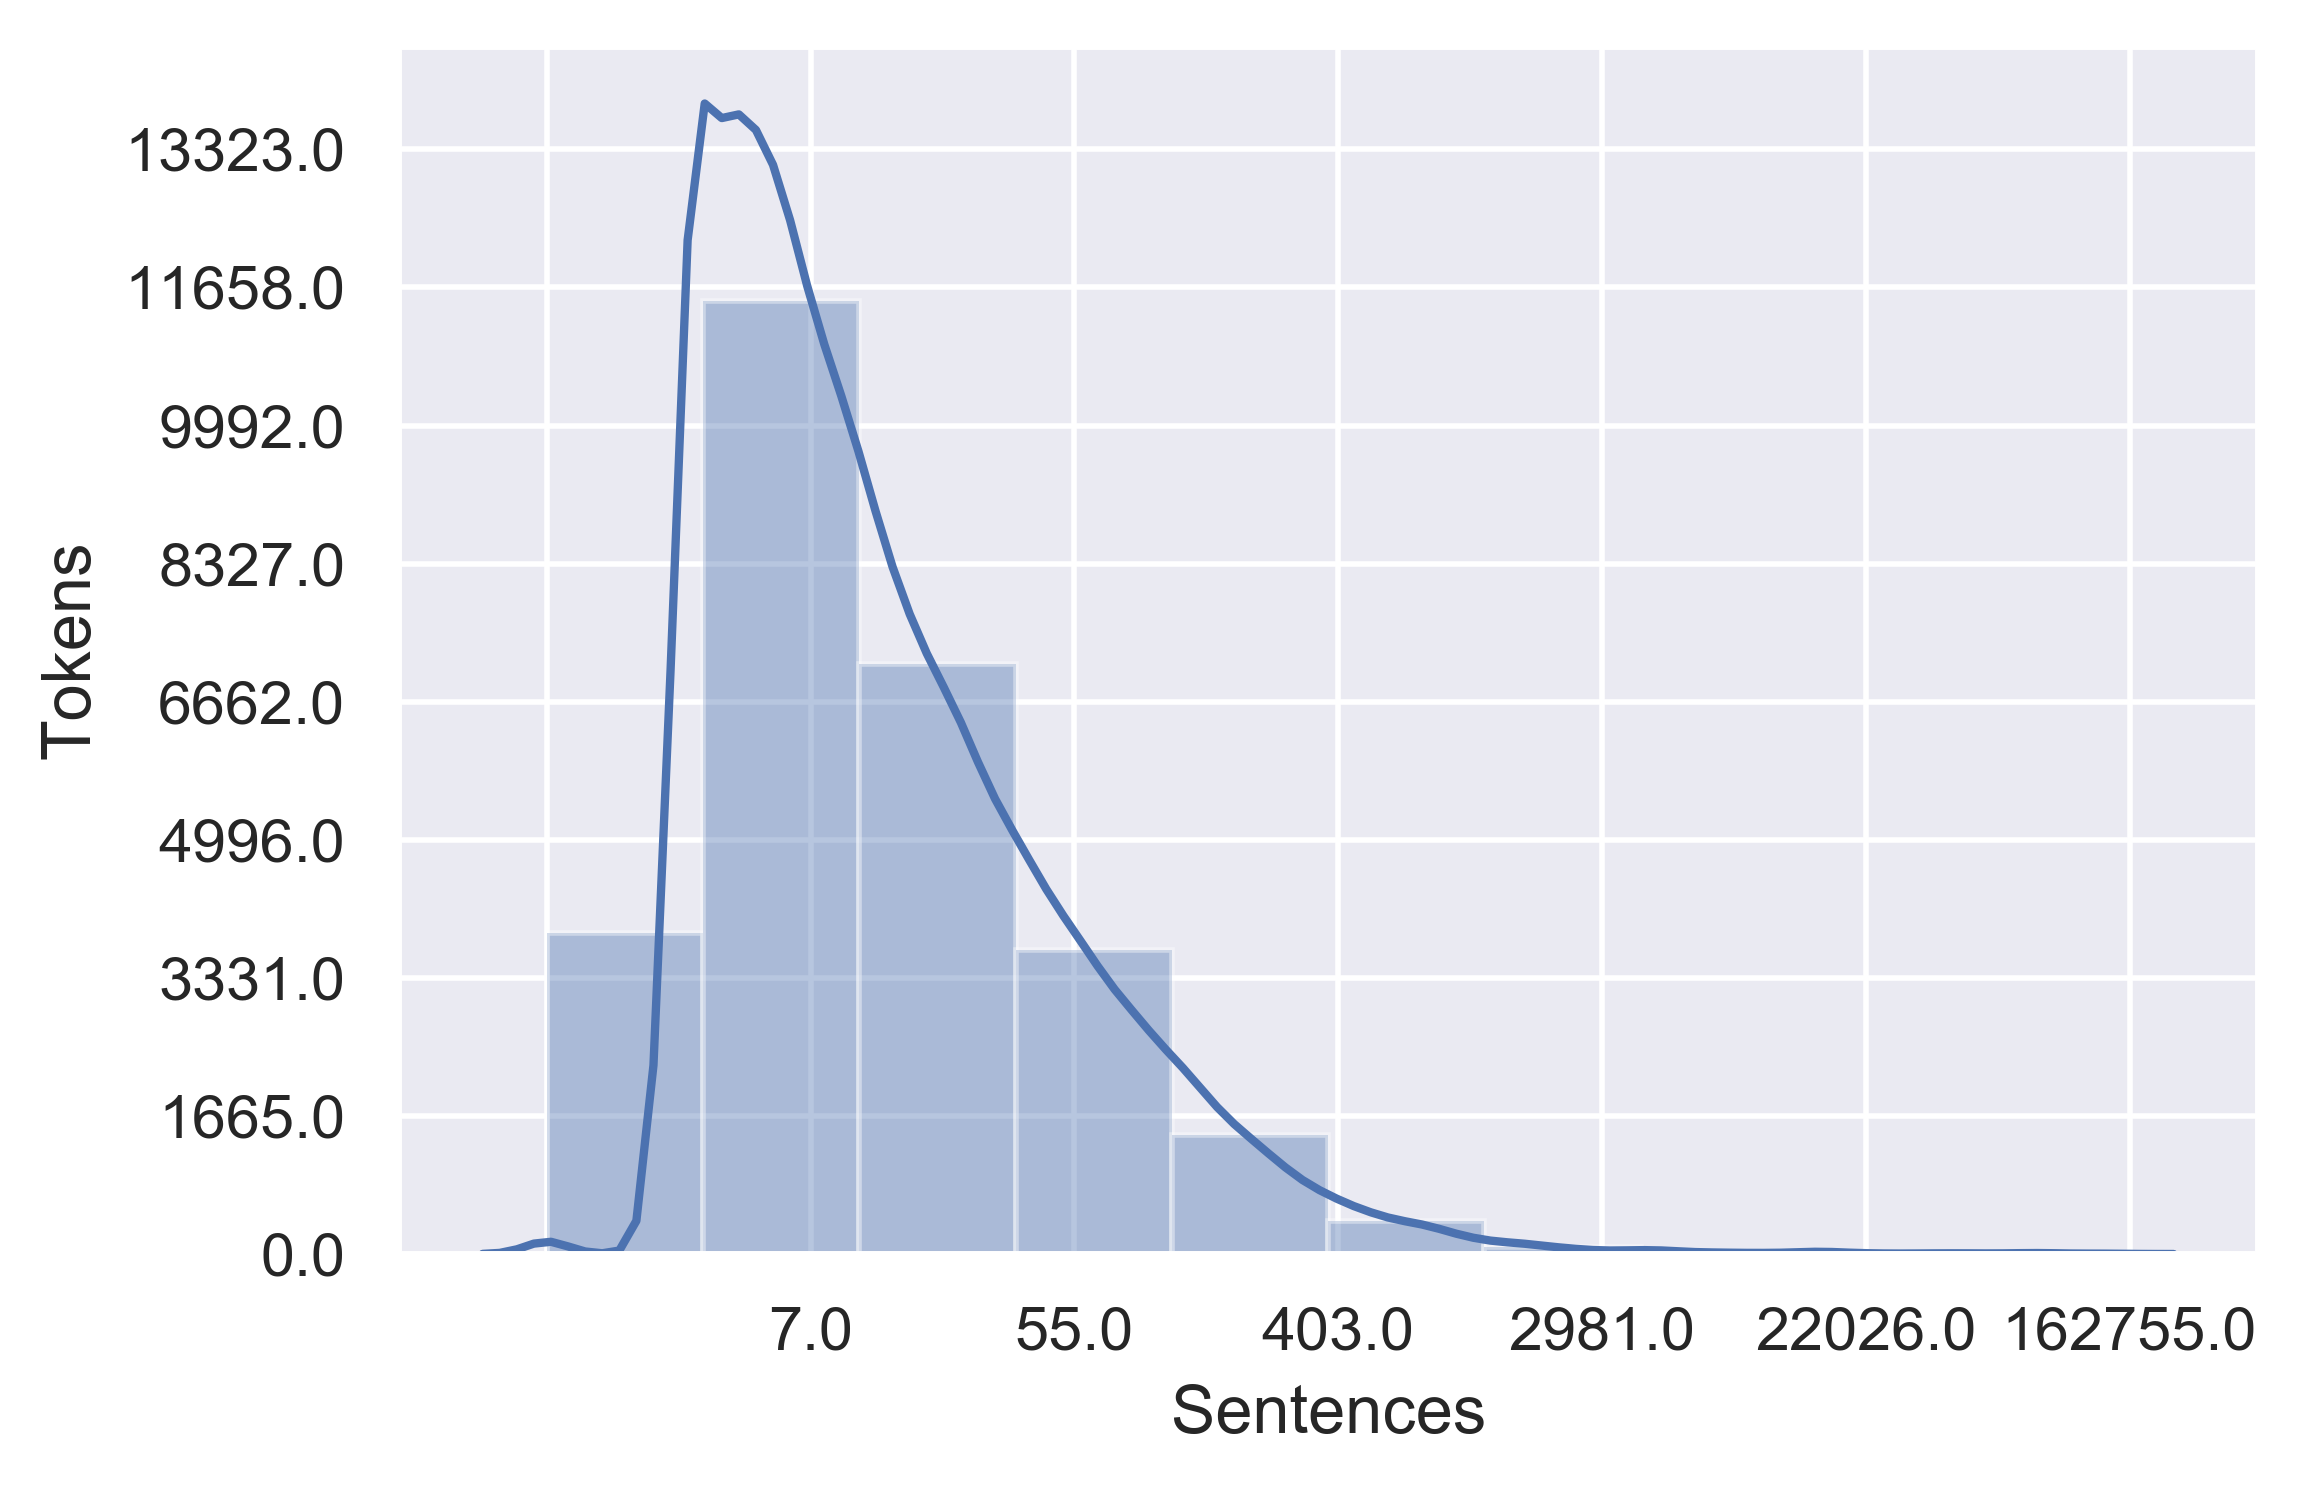

In [86]:
fig, ax = plt.subplots()

sns.distplot(np.log(frequencies), bins=10, ax=ax)

ax.set_ylabel('Tokens')

ax.set_xlabel('Sentences')

def format_log(x, pos):
    if x > 0:
        return np.rint(np.exp(x))
    return None

def format_perc(x, pos):
    size = frequencies.size
    return np.rint(x * size)

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(format_log))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(format_perc))